In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
sns.set(color_codes=True)

In [8]:
TRAIN = '/home/ygx/dev/kaggle/scene/data/csv/original/train.csv'
TEST = '/home/ygx/dev/kaggle/scene/data/csv/original/test.csv'

OUT_TRAIN = '/Users/yngtodd/src/kaggle/scene/data/textfiles/train.txt'
OUT_TEST = '/Users/yngtodd/src/kaggle/scene/data/textfiles/test.txt'

PROCESSED_TRAIN = '/Users/yngtodd/src/kaggle/scene/data/csv/processed/train.csv'
LABELS = '/Users/yngtodd/src/kaggle/scene/data/labels.npy'

In [4]:
def write_text(datapath, outpath):
    """Save text data to regular text file."""
    data = pd.read_csv(datapath)
    txt = data['text']
    txt.to_csv(outpath, sep=' ', index=False, header=False)

In [5]:
def load_data(datapath):
    return pd.read_csv(datapath)

In [6]:
def encode_labels(data):
    le = LabelEncoder()
    y_data = data['genre'].values
    labels = le.fit_transform(y_data)
    data['labels'] = labels
    vals, counts = np.unique(labels, return_counts=True)
    print(f'Labels: {vals}\nCounts: {counts}')
    return data

In [28]:
write_text(TRAIN, OUT_TRAIN)
write_text(TEST, OUT_TEST)

In [9]:
train = load_data(TRAIN)
test = load_data(TEST)

In [10]:
train = encode_labels(train)

Labels: [0 1 2 3 4 5 6 7 8]
Counts: [2392  147 2941 8873  456  270   63  613 6824]


/home/ygx/dev/kassa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


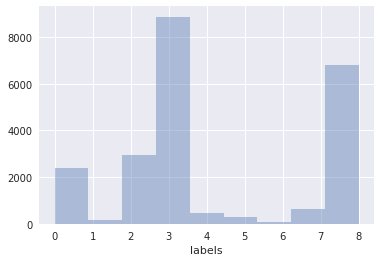

In [11]:
sns.distplot(train['labels'], bins=9, kde=False);

In [82]:
train.to_csv(PROCESSED_TRAIN, index=False)

In [84]:
labels = train['labels'].values
np.save(LABELS, labels)

In [7]:
train['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

In [14]:
train[0:10]

,id,text,genre,labels
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,2
2,3,"up Come, I have a surprise.... She takes him ...",drama,3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,5,"nd dismounts, just as the other children reach...",drama,3
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller,8
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama,3
8,10,"Memphis goes back into the garage, Budgy cack...",thriller,8
9,11,e reels as the world spins. Sweat pours off hi...,action,0
